### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

### Data Cleaning
- Handling Missing values
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

### 3.1) Check Null Values

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

`Conclusion:`
There are no missing values.

### 3.2) Handling Duplicates

In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

### Feature Engineering

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Numeric Features

In [8]:
num_features = df.select_dtypes(exclude="object").columns

In [9]:
num_features = num_features.drop("expenses")

In [10]:
num_features

Index(['age', 'bmi', 'children'], dtype='object')

### Categorical Features

In [11]:
cat_features = df.select_dtypes(include="object").columns

In [12]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

### Split into X & Y

In [13]:
X = df.drop("expenses",axis=1)
y = df["expenses"]

In [14]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [15]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

### Feature Transformation

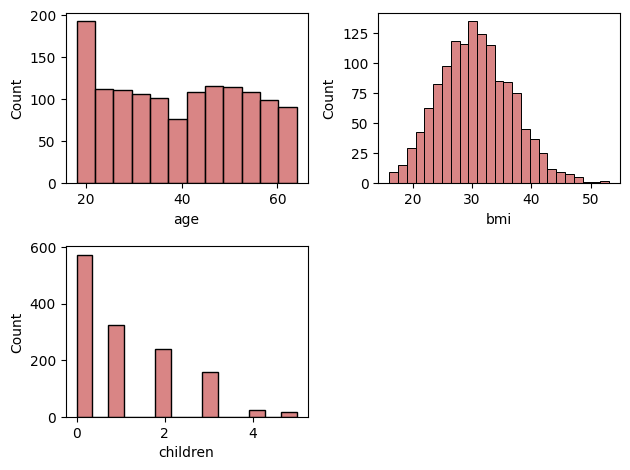

In [16]:
for i, col in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [17]:
# Check Skewness
df[num_features].skew(axis=0, skipna=True)

age         0.054781
bmi         0.284463
children    0.937421
dtype: float64

### Preprocessing using Column Transformer

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
oh_columns = ["sex","region"]
or_columns = ["smoker"]

from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

oh_transformer = OneHotEncoder()
or_transformer = OrdinalEncoder(categories=[["yes","no"]])
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("ohe",oh_transformer,oh_columns),
        ("ordinal",or_transformer,or_columns),
        ("sc",numeric_transformer,num_features)
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.44041773,
        -0.4534842 , -0.90923416],
       [ 0.        ,  1.        ,  0.        , ..., -1.51164747,
         0.51398555, -0.07944162],
       [ 0.        ,  1.        ,  0.        , ..., -0.79935006,
         0.38280321,  1.58014347],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.51164747,
         1.02231711, -0.90923416],
       [ 1.        ,  0.        ,  0.        , ..., -1.29795825,
        -0.79783783, -0.90923416],
       [ 1.        ,  0.        ,  0.        , ...,  1.55123139,
        -0.25671069, -0.90923416]])

### Train , Test & Split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((1069, 10), (268, 10))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
def evaluate_reg(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    r2 = r2_score(true,predicted)
    return mse , mae, r2

In [25]:
models = {
    "RF": RandomForestRegressor(),
    "DT": DecisionTreeRegressor(),
    "BR": BaggingRegressor(),
    "GR": GradientBoostingRegressor(),
    "AD": AdaBoostRegressor(),
    "KNN":KNeighborsRegressor()
}

In [26]:
def evaluate_models(models):

    models_list = []
    mse = []
    mae = []
    r2 = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_mse,model_train_mae,model_train_r2 = evaluate_reg(y_train,y_train_pred)

        model_test_mse,model_test_mae,model_test_r2 = evaluate_reg(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print(f"- mse: {model_train_mse}")
        print(f'- mae: {model_train_mae}') 
        print(f'- r2: {model_train_r2}')
        
        
        print('----------------------------------')

        print('Model performance for Test set')
        print(f"- mse: {model_test_mse}")
        print(f'- mae: {model_test_mae}') 
        print(f'- r2: {model_test_r2}')
        r2.append(model_test_r2)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2)), columns=['Model Name', 'r2']).sort_values(by=['r2'], ascending=False)

    # report=pd.DataFrame(model_test_r2)
        
    return report

### Model Training

In [27]:
model_report = evaluate_models(models = models)

RF
Model performance for Training set
- mse: 3398039.4122051466
- mae: 1007.5966965388214
- r2: 0.9751813342085747
----------------------------------
Model performance for Test set
- mse: 22089050.618550796
- mae: 2606.5417526119404
- r2: 0.8797914496170092


DT
Model performance for Training set
- mse: 0.0
- mae: 0.0
- r2: 1.0
----------------------------------
Model performance for Test set
- mse: 39764288.32553134
- mae: 2939.1417910447763
- r2: 0.7836028564935666


BR
Model performance for Training set
- mse: 4917015.389159693
- mae: 1169.276647333957
- r2: 0.9640870081740294
----------------------------------
Model performance for Test set
- mse: 22122260.43129909
- mae: 2498.5489067164176
- r2: 0.8796107219108754


GR
Model performance for Training set
- mse: 15241446.22438122
- mae: 2141.707633736513
- r2: 0.8886792311289232
----------------------------------
Model performance for Test set
- mse: 18944570.58033593
- mae: 2590.793864810245
- r2: 0.8969037010047902


AD
Model perf

### Result of all models

In [28]:
model_report

,Model Name,r2
3,GR,0.896904
0,RF,0.879791
2,BR,0.879611
4,AD,0.860883
1,DT,0.783603
5,KNN,0.549242


In [29]:
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

In [30]:
random_cv = [
    ("RF",RandomForestRegressor(),rf_params)
]

In [31]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in random_cv:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': None, 'max_depth': 10}


In [32]:
model_param

{'RF': {'n_estimators': 100, 'max_features': None, 'max_depth': 10}}

### Retraining Models

In [33]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF']),
}
tuned_report =evaluate_models(models=best_models)

Random Forest Regressor
Model performance for Training set
- mse: 4879052.87487692
- mae: 1208.7343266230916
- r2: 0.9643642795179703
----------------------------------
Model performance for Test set
- mse: 20656047.876433708
- mae: 2524.514527337587
- r2: 0.8875898464471599




In [34]:
tuned_report

,Model Name,r2
0,Random Forest Regressor,0.88759


In [35]:
best_model = RandomForestRegressor(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test,y_pred)


print("FINAL MODEL 'RF'")
print ("R2 Score: {}".format(r2))


FINAL MODEL 'RF'
R2 Score: 0.8840436564572655


### Best Model is Random Forest Regressor(RF) with Accuracy 88.40%